In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#font CMU Serif
plt.rcParams.update({'font.family': 'STIXGeneral','font.size':'12','axes.formatter.use_mathtext':'True'})

# Numerical Simulation Laboratory (NSL)
## Numerical exercises 2


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

Show a picture of both your estimations of and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.


## <span style="color:purple"> Solution Exercise 02.1</span>

### Problem's Theory:
- To solve this integral I used the Monte Carlo integration: given $$I=\int_{\Omega}g(x)p(x)dx$$ where $p(x)$ is a probability distribution and $g(x)$ an integrable function. A set of variables $x_i$ distributed with $p(x)$ can be drawn, that can be used to obtain: $$G_N=\frac{1}{N}\sum_{i=1}^Ng(x_i)$$ The error can be defined as follow: $\epsilon=\frac{\sigma}{\sqrt{N}}$ where $\sigma=\int_{\Omega}g(x)^2p(x)dx-I^2$. Finally, the error can be inverted to show the number of samples needed to yield a desired error: $N=\frac{\sigma^2}{\epsilon^2}$.

- Evaluating the integral with a standard quadrature on an n-dimensional domain: $I\approx\sum_iw_ig(x_i)p(x_i)$ where $w_i$ is
a series of quadrature weights and $x_i$ a lattice of points. If we assume that the time necessary for a computation will be
proportional to the total number of points used, can be shown that the time of computation $t_c \propto t_0e^{-\frac{d}{k}}$. On the other hand, in a Monte Carlo calculation is: $t_c=Nt_I=t_I\frac{\sigma^2}{\epsilon^2}=Q_I\epsilon^{-2}$ where $t_I$ is the time for an individual sampling.

- For large $d$ it is difficult to find a $k$ in the equation for $t_c$ such that $\frac{d}{k} < 2$ , so asymptotically ($n\rightarrow\infty$) a Monte Carlo calculation is more advantageous than a numerical integration.

- Two different Monte Carlo evaluations of an integral can have differing variances. $Q_I$ is a measure of the quality of a Monte Carlo calculation. If the distribution probability $p(x)$ is not the best one we can introduce a different one as follow: $$I=\int\frac{g(x)p(x)}{d(x)}d(x)dx $$ where $d(x)$ is a distribution probability.

- minimizing the functional that satisfies the previously criterias with the Lagrange multipliers show that $I$ is the best probability distribution! This isn't  very useful since the integral solution is not known, but we can find similar distribution to reduce $\sigma^2$ with Taylor's expansion for example!

### Problem's approach:
- To solve the integral sampling a uniform distribution I used the blocking method summing over the block the quantity $\frac{\pi}{2}\cos(\pi x/2)$ where $x$ is a random number distributed uniformly in $[0,1]$.
- To solve the integral sampling with a more intelligent $p(x)$ to reduce $\sigma^2$ I have calculated Taylor's expansion arrested at first order in $x=1$ for the integrand function: $$ I= \frac{\pi}{2}\cos(\pi x/2) \approx -\frac{\pi^2}{4}x+\frac{\pi^2}{4}=:f(x) $$
- Then i have normalized $f(x)$ in $x\in[0,1]$ obtaining $p(x)=2(1-x)$. In the end, to campionate the distribution i have to invert the cumulative, so  i have computed: $$ F(x)=\int f(x)=2x-x^2=y \Leftrightarrow x= 1-\sqrt{1-y} \Rightarrow y=1-\sqrt{1-x}=F^{-1}(x)$$
### Code:
The following extract of code shows the two different sampling of the function with a uniform distribution and with a Taylor expansion.
```cpp
            // calculation of the integral with uniform distribution
            rnd_number=rnd.Rannyu();
            function += M_PI/2*cos(M_PI*rnd_number/2);
            // calculation of the integral with Taylor distribution
            Taylor_rnd_number_distribution=1-sqrt(1-rnd.Rannyu());
            Px=2-2*Taylor_rnd_number_distribution;
            Taylor_function += M_PI/2*cos(M_PI*Taylor_rnd_number_distribution/2)/Px;
```
### Plot Parameters:
- $N_{blocks} = 100$
- $L_{blocks} = 10^4$
### Results:
- As we can see in the following plots the error of the integral calculated with importance sampling is smaller that the integral computed via uniform distribution.

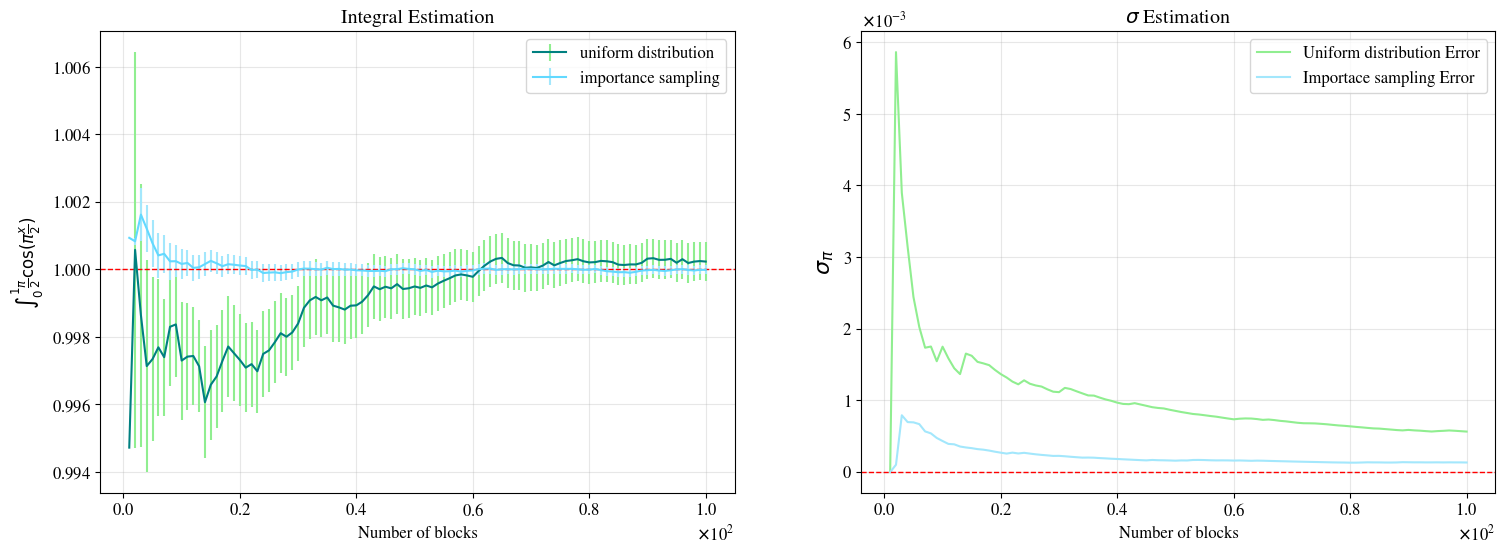

In [2]:
data = np.loadtxt('../lecture_2/Results/ex_02.1_integral.txt', delimiter=';', skiprows=1)  # Skip the first row (header)
throws = data[:, 0]
u_integral = data[:, 1]
u_integral_error = data[:, 2]
sampled_integral = data[:,3]
sampled_integral_error = data[:,4]
# Plot:
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].errorbar(throws, u_integral,color='#008080', yerr=u_integral_error, label='uniform distribution', ecolor='#90ee90',alpha=1)
ax[0].errorbar(throws, sampled_integral,color='#62d9ff', yerr=sampled_integral_error, label='importance sampling', ecolor='#a3e7fc',alpha=1)
ax[0].axhline(1, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
ax[0].set_title(r'Integral Estimation')
ax[0].set_xlabel('Number of blocks')
ax[0].set_ylabel(r'$\int_0^1 \frac{\pi}{2}\cos(\pi \frac{x}{2})$')
ax[0].legend()
ax[0].grid(True,alpha=0.3)
ax[0].ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax[1].plot(throws, u_integral_error, label='Uniform distribution Error', color='#90ee90')
ax[1].plot(throws, sampled_integral_error, label='Importace sampling Error', color='#a3e7fc')
ax[1].legend()
ax[1].axhline(0, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
ax[1].set_title('$\sigma$ Estimation')
ax[1].set_xlabel('Number of blocks')
ax[1].set_ylabel('$\sigma_{\pi}$',fontsize='16')
ax[1].grid(True,alpha=0.3)
ax[1].ticklabel_format(style='sci', axis='both', scilimits=(0,0))

### Exercise 02.2
- 3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin
1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

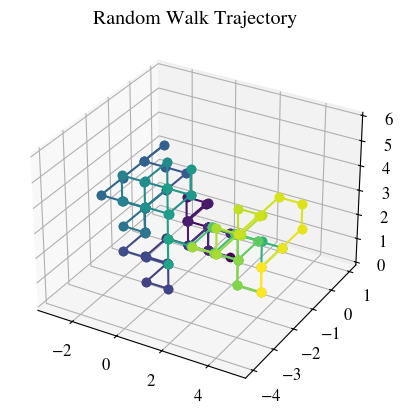

In [3]:
# font CMU Serif
plt.rcParams.update({'font.family': 'STIXGeneral','font.size':'12','axes.formatter.use_mathtext':'True'})
# Load data
x, y, z = np.loadtxt('../lecture_2/Results/ex_02.2_random_walk_trajectory.txt', delimiter=';', skiprows=1, unpack=True)
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Create a colormap
colors = cm.viridis(np.linspace(0, 1, len(x) - 1))
# Plot the trajectory in segments, changing color at each step
for i in range(len(x) - 1):
    ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=colors[i], marker='o')
# Set the title
ax.set_title('Random Walk Trajectory')
# Show the plot
plt.show()

## <span style="color:purple"> Solution Exercise 02.2</span>

### Problem's theory:
A stochastic process is a family of random variables $x_t$. Study and simulate a stochastic process can be a very hard task, so is preferred to impose some constraints that simplify the process. If a process depends only on the previous position (has no memory), is called Markov Process. The most important Markov Process is the random walk. In random walks every jump follows a probability distribution. 
- A 1D Random Walk where the pobability to jump right or left is $0.5$ can be modelized thinking that at every step a coin is flipped: Head corresponds to jump on the right while Tail to jump on the left. This is called Bernoulli process. 
- A 3D Random walk is a process where the random variable has three dimensions. This means that each step $\Delta r=(\Delta x,\Delta y,\Delta z)$ depends on three 1D random variables $x,y,z$ that has a probability distribution.
- A continuum random walk is thinkable as a serie of $N$ jumps of a discrete random walk where the size of each jump $\Delta x \rightarrow 0$ and $N \rightarrow \infty$. In a discrete Random walk, reminding Chapman Kolmogorv equtation, the probability to be in $x=na$ after $s$ steps is: $$ p_1\big(na|\left(s+1\right)\tau\big)=\sum_{m=-\infty}^{\infty}p_{1|1}\big(na,(s+1)\tau|ma,s\tau\big)p_1(ma,s\tau)$$
  In a continuum random walk the transition probability $p_{1|1}\big(na,(s+1)\tau|ma,s\tau\big)=\frac{1}{2}\delta_{m+1,n}+\frac{1}{2}\delta_{m-1,n}$ so: $$p_1\big(na|\left(s+1\right)\tau\big)=p_1\big((n+1)a|s\tau\big)+p_1\big((n-1)a|s\tau\big)$$
- subtracting $p_1(na|s\tau)$ and dividing by $\tau$ each side the result is the following  differential equation which represent a **diffusive motion** : $$ \frac{\partial p_1(x,t)}{\partial t}=D\frac{\partial^2p_1(x,t)}{\partial x^2} $$ That, solved, gives: $\left<x(t)\right>=0$ and $\left<x^2(t)\right>=2Dt$.

### Problem's approach:
- To solve this exercise I decided to try not to use vector in order to don't save $10^5$ trajecories of random walk. To do so for each step I have used the blocking method where in each block were performed $L$ random walks for N steps, for each random walk I have computed the square distance from the origin of the final position and finally I have computed the average value $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$
- To perform the random walk I have implemented two different functions: `discrete walk` and `continuous walk` that take in input a random number generator, an arma vec and the lattice step and return the new position of the random walk.

### Code:
This is the starting part of the code where is performed the blocking method for each random walk:
```cpp
    for(int k=0; k<N_step;k++){
        // set to zero the variables to compute the block average for each step
        discRW_sum_prog_helper=0.0, discRW_su2_prog_helper=0.0;
        contRW_sum_prog_helper=0.0, contRW_su2_prog_helper=0.0;
        for (int m=0;m<N_block;m++){
            discRW_r_mean=0.0;contRW_r_mean=0.0;
            for(int l=0;l<L;l++){
                //running the Random walk
                p_discrete={0.0,0.0,0.0};p_continuous={0.0,0.0,0.0};
                for(int j=0;j<k+1;j++){
                    p_discrete=discrete_walk(rnd,p_discrete,a);
                    p_continuous=continuous_walk(rnd,p_continuous,a);
                }
                // distance of the RW
                discRW_r=distance2(p_discrete);
                contRW_r=distance2(p_continuous);
                ...
```
The following codes are respectively the `discrete_walk` and the `continuous walk` functions:
```cpp
vec discrete_walk(Random &rnd,const vec &p, const double a){
    vec p_new=p;
    double random_number=rnd.Rannyu(0,6);
    if(random_number>=0 && random_number<1){p_new[0]+=a;}
    if(random_number>=1 && random_number<2){p_new[0]-=a;}
    if(random_number>=2 && random_number<3){p_new[1]+=a;}
    if(random_number>=3 && random_number<4){p_new[1]-=a;}
    if(random_number>=4 && random_number<5){p_new[2]+=a;}
    if(random_number>=5 && random_number<6){p_new[2]-=a;}
    return p_new;
}
```

```cpp
vec continuous_walk(Random &rnd, const vec &p, const double a){
    vec p_new=p;
    // uniform distribution around a sphere
    vec angles=rnd.spherical();
    double theta=angles[0];
    double phi=angles[1];
    p_new[0]+=a*sin(theta)*cos(phi);
    p_new[1]+=a*sin(theta)*sin(phi);
    p_new[2]+=a*cos(theta);
    return p_new;
} 
```
where spherical is a method implemented in the `Random` class that returns the angles $\theta$ and $\phi$ from a spherical distribution:
```cpp
arma::vec Random :: spherical(){
    // This function generates a random point on the unit sphere
    double theta=acos(1-2*Rannyu());
    double phi=2*M_PI*Rannyu();
    return {theta,phi};
}
```
### Plot Parameters:
- $N_{rw} = 10^5$ number of random walks
- $N_{steps} = 100$ number of step for each random walk
- $N_{blocks} = 100$
- $L_{blocks} = 10^3$

### Results:
- As we can see in the following plots the random walks impletend perform a diffusive motion, in fact the root-mean-square displacement is pefectly fitted with a root function, tipical of the diffusive motion.  


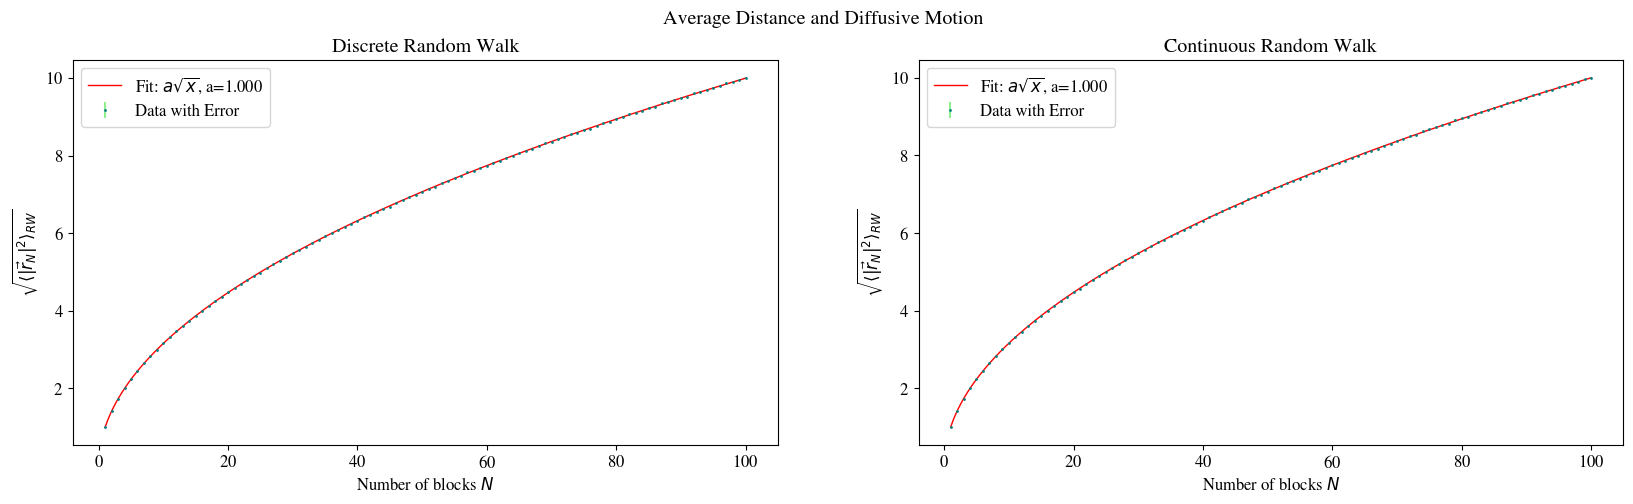

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Load data
data_files = ['../lecture_2/Results/ex_02.2_discrete_random_walks.txt', '../lecture_2/Results/ex_02.2_continuous_random_walks.txt']
data = [np.loadtxt(f, delimiter=';', skiprows=1, unpack=True) for f in data_files]
# Define the model function (sqrt(x))
def sqrt_model(x, a):
    return a * np.sqrt(x)
# Fit the model to both datasets
fit_results = [curve_fit(sqrt_model, N_walk, sqrt_N) for N_walk, sqrt_N, _ in data]
# Generate points for fitted curves
fit_points = [np.linspace(min(N_walk), max(N_walk), 500) for N_walk, _, _ in data]
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('Average Distance and Diffusive Motion')
# Labels and titles for both subplots
titles = ['Discrete Random Walk', 'Continuous Random Walk']
for i, (N_walk, sqrt_N, err), fit_x, (popt, _) in zip(range(2), data, fit_points, fit_results):
    ax[i].errorbar(N_walk, sqrt_N, color='#008080', yerr=err, label='Data with Error', ecolor='#90ee90', alpha=1, fmt='.', markersize=2)
    ax[i].plot(fit_x, sqrt_model(fit_x, popt[0]), label=f'Fit: $a \sqrt{{x}}$, a={popt[0]:.3f}', color='red', linewidth=1)
    ax[i].set_xlabel('Number of blocks $N$')
    ax[i].set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
    ax[i].set_title(titles[i])
    ax[i].legend()
# Show the plot
plt.show()

### How to sample uniformly the solid angle?
- To sample uniformly a solid angle we have to sample uniformly two angles $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$. $\Phi$ is uniformly distributed in $[0,2\pi]$ while $\theta$ no! In fact, if $\theta$ was uniformly distributed the point extracted would be concentred on the poles of the sphere.
- To avoid this problem $\theta$ is sampled with probability distribution $p(x)=\rho \sin(\theta)$ opportunately normalized in $[0,\pi]$ $\Rightarrow P(\theta)=\frac{1}{2}\sin(\theta)$.
- Inverting the cumulative function of the probability distribution is obtained: $$ x=\arccos(-2y+1) $$ 
where y is uniformly distributed in $[0,1]$